In [50]:
# Question 1

In [79]:
3D surface plot

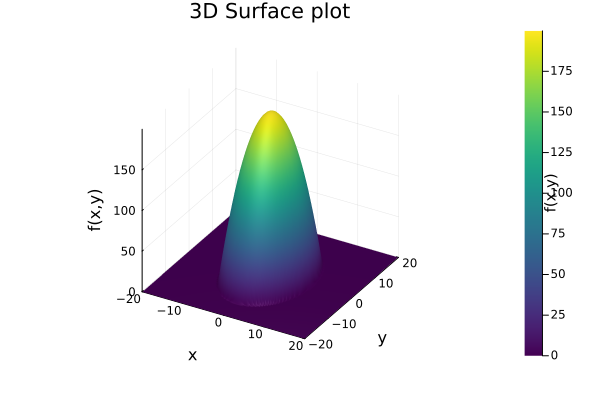

In [52]:
using Plots

f(x,y) = 200 - x^2 - 2y^2
xs = range(-20, 20, length=100)
ys = range(-20, 20, length=100)

z = [max(f(xi, yi), 0) for xi in xs, yi in ys]

surface(xs, ys, z,
        xlabel="x", ylabel="y", zlabel="f(x,y)", title="3D Surface plot", color=:viridis, colorbar_title ="f(x,y)")


In [80]:
2D contour plot

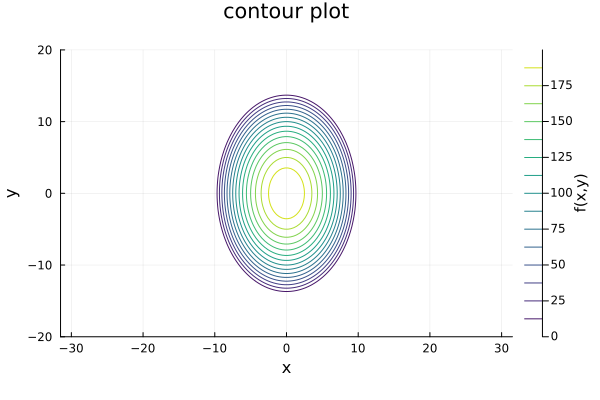

In [54]:
using Plots

f(x, y) = 200 - x^2 - (2*y^2)

x = range(-20, 20, length=100)
y = range(-20, 20, length=100)
z = [max(f(xi, yi), 0) for xi in x, yi in y]


Plots.contour(x, y, z; aspect_ratio=1,xlabel="x", ylabel="y",title="contour plot", colorbar_title="f(x,y)",color=:viridis)

In [81]:
Gradient of the scalar field

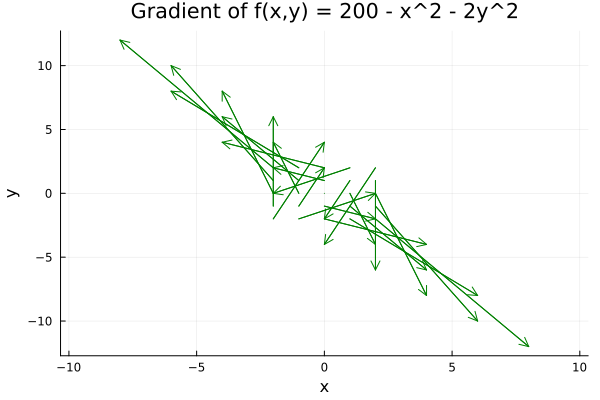

In [95]:
using ForwardDiff
using Plots

function Gradient(x,y)
f(x, y) = 200 - x^2 - 2*y^2 

∂f_∂x(x, y) = ForwardDiff.derivative(x_ -> f(x_, y), x)
∂f_∂y(x, y) = ForwardDiff.derivative(y_ -> f(x, y_), y)

return[∂f_∂x(x, y), ∂f_∂y(x, y)]
end

p = -2:1:2
q = -2:1:2
U = zeros(length(p), length(q))
V = zeros(length(p), length(q))


for (i, xi) in enumerate(p)
    for (j, yi) in enumerate(q)
        Z = Gradient(xi, yi)
        U[i, j] = Z[1]
        V[i, j] = Z[2]
    end
end

X = repeat(p, inner=length(q))
Y = repeat(q, outer=length(p))
U_flat = vec(U)+X
V_flat = vec(V)+Y

quiver(X, Y, quiver=(U_flat, V_flat), title="Gradient of f(x,y) = 200 - x^2 - 2y^2", xlabel="x", ylabel="y", aspect_ratio=:0.5, color="green")

In [57]:
# Question 2

In [82]:
(a)Vector Field

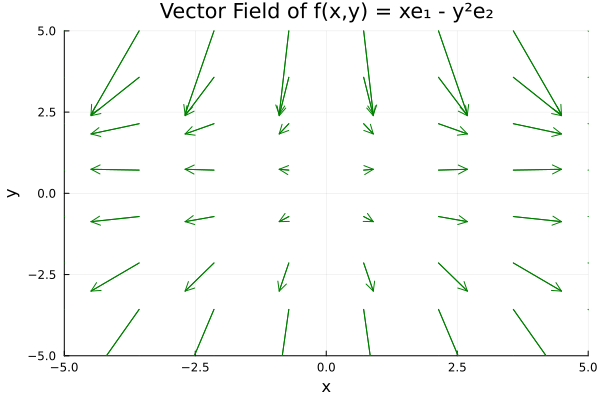

In [59]:
using Plots
gr()
using TensorFields
using CalculusWithJulia
V2(x, y) = [2*x , y*(1 - y)]
p = vectorfieldplot(V2,xlim=(-5,5), ylim=(-5,5), xlabel="x", ylabel="y", title="Vector Field of f(x,y) = xe₁ - y²e₂", color="green")
display(p)


In [83]:
(b)Divergence of vector field

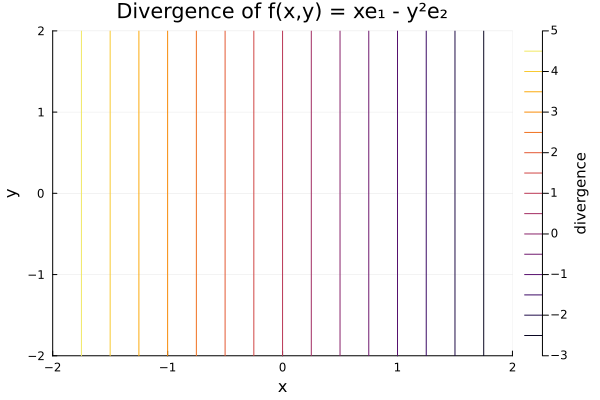

In [61]:
using CalculusWithJulia, Plots

g(u) = [u[1], -1*u[2]^2]

c2 = divergence(g) #inbuilt function

x = -2:0.2:2
y = -2:0.2:2

Z2 = [c2([xi, yi]) for xi in x, yi in y]

plot(x, y, Z2; title="Divergence of f(x,y) = xe₁ - y²e₂", xlabel="x", ylabel="y", colorbar_title="divergence")


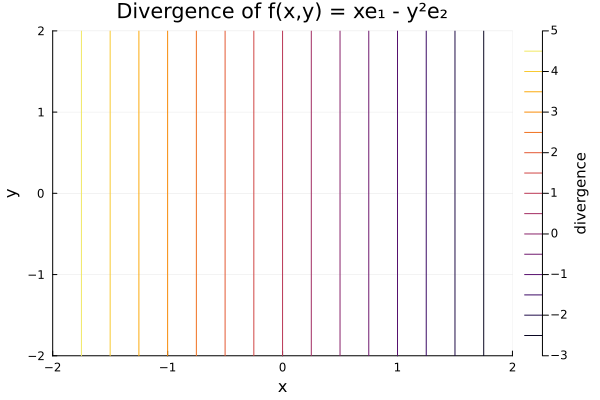

In [62]:
using ForwardDiff

function Divergence(x,y) #defining divergence 
    f(x,y) = x
    g(x,y) = -(y^2)

    ∂f_∂x(x, y) = ForwardDiff.derivative(x_ -> f(x_, y), x)
    ∂g_∂y(x, y) = ForwardDiff.derivative(y_ -> g(x, y_), y)
    
    C = ∂f_∂x(x, y) + ∂g_∂y(x, y)
    return C
end

p = -2:0.2:2
q = -2:0.2:2

Z = [Divergence(xi, yi) for xi in p, yi in q]


plot(p, q, Z; title="Divergence of f(x,y) = xe₁ - y²e₂", xlabel="x", ylabel="y", colorbar_title="divergence")


In [84]:
Curl of Vector field

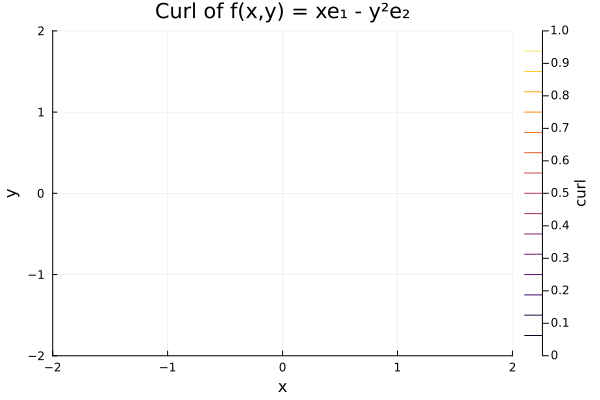

In [64]:
using CalculusWithJulia, Plots

g(u) = [u[1], -1*u[2]^2]
c2 = curl(g)

x = -2:0.2:2
y = -2:0.2:2

Z2 = [c2([xi, yi]) for xi in x, yi in y]

plot(x, y, Z2; title="Curl of f(x,y) = xe₁ - y²e₂", xlabel="x", ylabel="y", colorbar_title="curl")


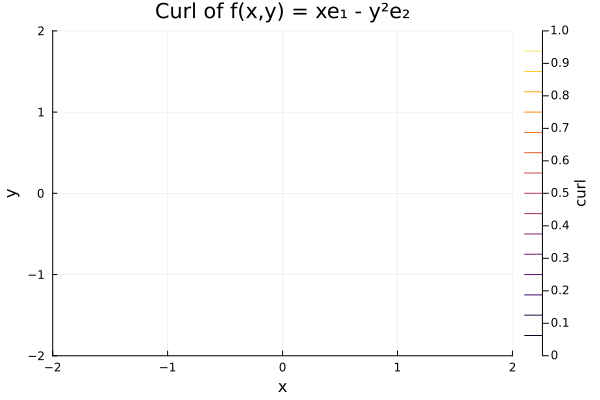

In [65]:
using ForwardDiff

function Curl(x,y)
    f(x,y) = x
    g(x,y) = -(y^2)

    ∂f_∂y(x, y) = ForwardDiff.derivative(y_ -> f(x, y_), y)
    ∂g_∂x(x, y) = ForwardDiff.derivative(x_ -> g(x_, y), x)

    C = ∂g_∂x(x, y) - ∂f_∂y(x, y)
    return C
end

p = -2:0.2:2
q = -2:0.2:2

Z = [Curl(xi, yi) for xi in p, yi in q]

plot(p, q, Z;
        title="Curl of f(x,y) = xe₁ - y²e₂", xlabel="x", ylabel="y", colorbar_title="curl")



In [66]:
# Question 3

In [85]:
(a)Vector Field

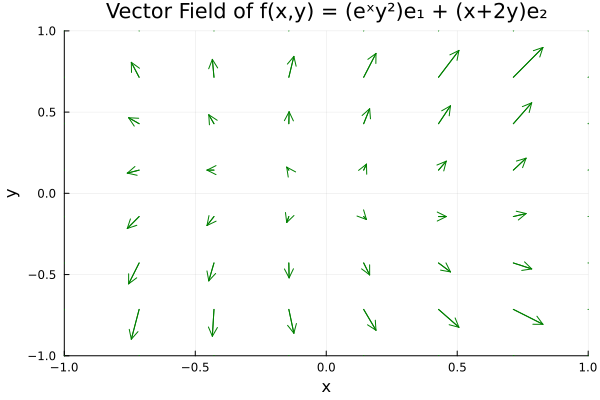

In [68]:
using Plots
gr()
using TensorFields
using CalculusWithJulia
V3(x, y) = [x+(exp(x) * y^2) , x + 3*y]
p = vectorfieldplot(V3,xlim=(-1,1), ylim=(-1,1), xlabel = "x", ylabel = "y", title="Vector Field of f(x,y) = (eˣy²)e₁ + (x+2y)e₂", color="green")
display(p)

In [86]:
(b)Divergence of vector field

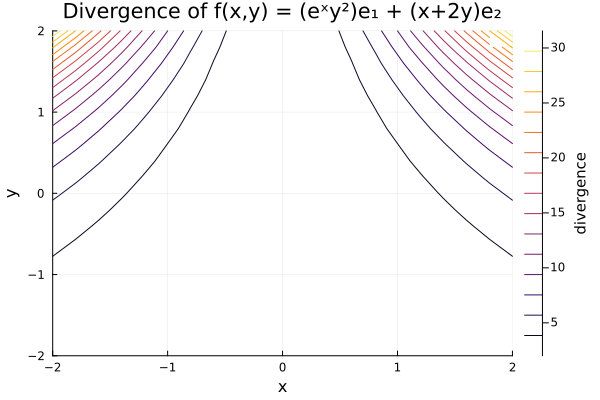

In [70]:
using CalculusWithJulia, Plots

f(u) = [exp(u[1]) * u[2]^2, u[1] + 2u[2]]
c = divergence(f)

x = -2:0.2:2
y = -2:0.2:2

Z = [c([xi, yi]) for xi in x, yi in y]

plot(x, y, Z; title="Divergence of f(x,y) = (eˣy²)e₁ + (x+2y)e₂", xlabel="x", ylabel="y", colorbar_title="divergence")


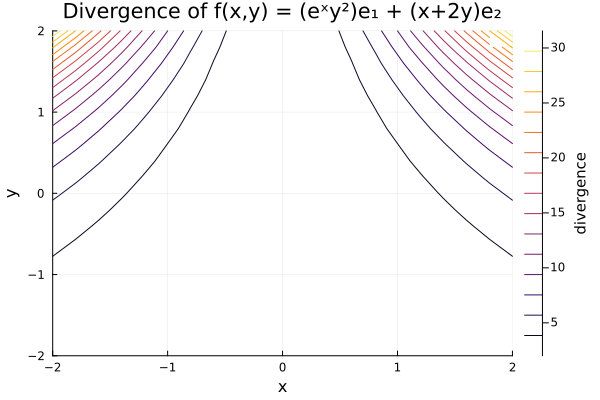

In [71]:
using ForwardDiff

function Divergence(x,y)
    f(x,y) = exp(x) * y^2
    g(x,y) = x + 2*y

    ∂f_∂x(x, y) = ForwardDiff.derivative(x_ -> f(x_, y), x)
    ∂g_∂y(x, y) = ForwardDiff.derivative(y_ -> g(x, y_), y)
    C = ∂f_∂x(x, y) + ∂g_∂y(x, y)
    return C
end

p = -2:0.2:2
q = -2:0.2:2

Z = [Divergence(xi, yi) for xi in p, yi in q]

plot(p, q, Z;
        title="Divergence of f(x,y) = (eˣy²)e₁ + (x+2y)e₂", xlabel="x", ylabel="y", colorbar_title="divergence")


In [87]:
(c)Curl of vector field

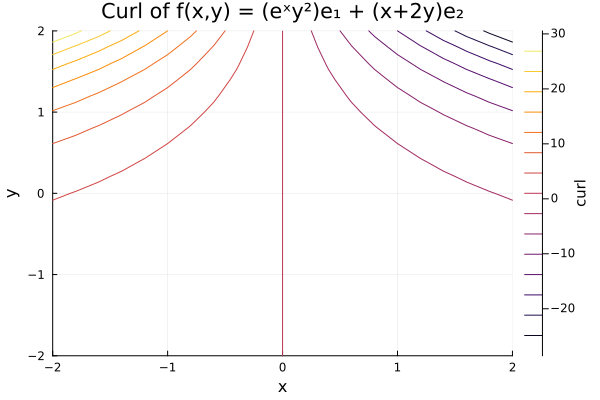

In [73]:
using CalculusWithJulia, Plots

f(u) = [exp(u[1]) * u[2]^2, u[1] + 2u[2]]

c = curl(f)

x = -2:0.2:2
y = -2:0.2:2

Z = [c([xi, yi]) for xi in x, yi in y]

plot(x, y, Z; title="Curl of f(x,y) = (eˣy²)e₁ + (x+2y)e₂",xlabel="x", ylabel="y",  colorbar_title="curl")


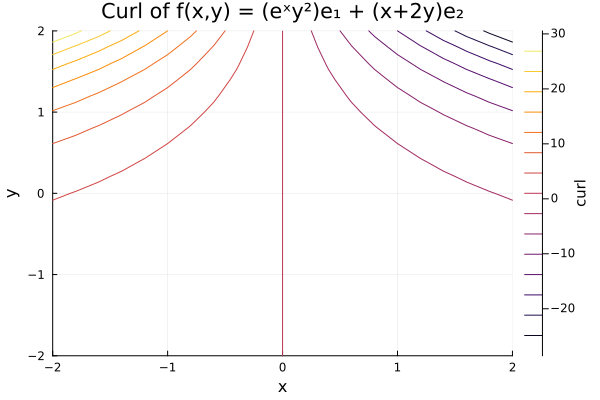

In [74]:
using ForwardDiff

function Curl(x,y)
    f(x,y) = exp(x) * y^2
    g(x,y) = x + 2*y

    ∂f_∂y(x, y) = ForwardDiff.derivative(y_ -> f(x, y_), y)
    ∂g_∂x(x, y) = ForwardDiff.derivative(x_ -> g(x_, y), x)

    C = ∂g_∂x(x, y) - ∂f_∂y(x, y)
    return C
end

p = -2:0.2:2
q = -2:0.2:2

Z = [Curl(xi, yi) for xi in p, yi in q]

plot(p, q, Z; title="Curl of f(x,y) = (eˣy²)e₁ + (x+2y)e₂", xlabel="x", ylabel="y", colorbar_title="curl")


In [75]:
# Question 4

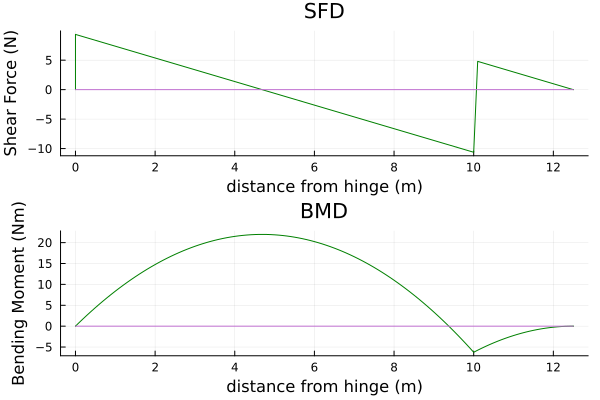

In [76]:
using Plots
q = 2
l = 10
L = 1.25*l
Ay = 0.375*q*L
By = 0.625*q*L

function SfdBmd(q,l,L,Ay,By)
    x = 0:0.1:L
    Sf = zeros(length(x))
    for (i, xi) in enumerate(x)
        if xi<l || xi==l
            Sf[i] = Ay - (q*xi)
        else
            Sf[i] = Ay + By - (q*xi)
        end
    end

    Bm = zeros(length(x))
    for (i, xi) in enumerate(x)
        if xi<l || xi==l
            Bm[i] = (Ay*xi) - (q*xi*xi*0.5)
        else
            Bm[i] = (Ay*xi) + By*(xi-l) - (q*xi*xi*0.5)
        end
    end
        
    p1 = plot(x,Sf, xlabel = "distance from hinge (m)", ylabel = "Shear Force (N)", title = "SFD", legend = false, color=:green)
    p1 = plot!([0,0], [0,Sf[1]],color=:green)
    p1 = plot!([L,L], [0,Sf[length(x)]],color=:green)
    p1 = plot!([0,L], [0,0])

    p2 = plot(x,Bm, xlabel = "distance from hinge (m)", ylabel = "Bending Moment (Nm)", title = "BMD", legend = false, color=:green)
    p2 = plot!([0,0], [0,Bm[1]],color=:green)
    p2 = plot!([L,L], [0,Bm[length(x)]],color=:green)
    p2 = plot!([0,L], [0,0])

    plot(p1,p2 ; layout = (2,1))
end

SfdBmd(q,l,L,Ay,By)


In [77]:
#Question 5

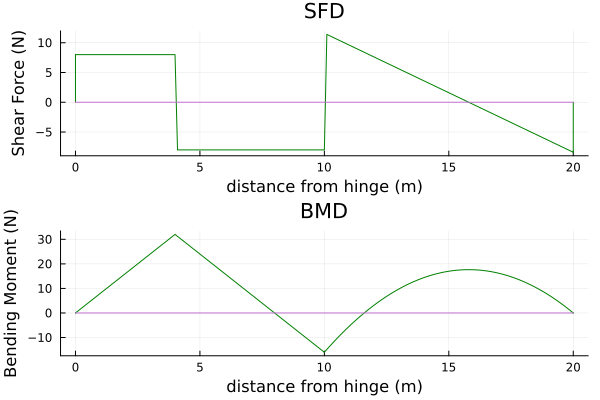

In [78]:
using Plots
q = 2
l = 10
L = 2*l
Ay = 0.4*q*l
By = 0.98*q*l
Cy = 0.42*q*l

function SfdBmd(q,l,L,Ay,By)
    x = 0:0.1:L
    Sf = zeros(length(x))
    for (i, xi) in enumerate(x)
        if xi<=0.4l
            Sf[i] = Ay
        elseif xi>0.4l && xi<=l
            Sf[i] = Ay - 0.8*q*l
        else
            Sf[i] = Ay + By - 0.8*q*l - q*(xi-l)
        end
    end

    Bm = zeros(length(x))
    for (i, xi) in enumerate(x)
        if xi<=0.4l
            Bm[i] = (Ay*xi)
        elseif xi>0.4l && xi<=l
            Bm[i] = (Ay*xi) - (0.8*q*l*(xi-0.4*l))
        else
            Bm[i] = (Ay*xi) + (By*(xi-l)) - (0.8*q*l*(xi-0.4*l)) - (q*(xi-l)*(xi-l)*0.5)
        end
    end
        
    p1 = plot(x,Sf, xlabel = "distance from hinge (m)", ylabel = "Shear Force (N)", title = "SFD", legend = false, color=:green)
    p1 = plot!([0,0], [0,Sf[1]],color=:green)
    p1 = plot!([L,L], [0,Sf[length(x)]],color=:green)
    p1 = plot!([0,L], [0,0])

    p2 = plot(x,Bm, xlabel = "distance from hinge (m)", ylabel = "Bending Moment (N)", title = "BMD", legend = false, color=:green)
    p2 = plot!([0,0], [0,Bm[1]],color=:green)
    p2 = plot!([L,L], [0,Bm[length(x)]],color=:green)
    p2 = plot!([0,L], [0,0])

    plot(p1,p2 ; layout = (2,1))
end

SfdBmd(q,l,L,Ay,By)
